# Text Classification Project
Now we're at the point where we should be able to:
* Read in a collection of documents - a *corpus*
* Transform text into numerical vector data using a pipeline
* Create a classifier
* Fit/train the classifier
* Test the classifier on new data
* Evaluate performance

For this project we'll use the Cornell University Movie Review polarity dataset v2.0 obtained from http://www.cs.cornell.edu/people/pabo/movie-review-data/

In this exercise we'll try to develop a classification model as we did for the SMSSpamCollection dataset - that is, we'll try to predict the Positive/Negative labels based on text content alone. In an upcoming section we'll apply *Sentiment Analysis* to train models that have a deeper understanding of each review.

## Perform imports and load the dataset
The dataset contains the text of 2000 movie reviews. 1000 are positive, 1000 are negative, and the text has been preprocessed as a tab-delimited file.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../TextFiles/moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


## Check for missing values:
We have intentionally included records with missing data. Some have NaN values, others have short strings composed of only spaces. This might happen if a reviewer declined to provide a comment with their review. We will show two ways using pandas to identify and remove records containing empty data.
* NaN records are efficiently handled with [.isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [.dropna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
* Strings that contain only whitespace can be handled with [.isspace()](https://docs.python.org/3/library/stdtypes.html#str.isspace), [.itertuples()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.itertuples.html), and [.drop()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

### Detect & remove NaN values:

In [2]:
df.isnull().sum()

label      0
review    35
dtype: int64

35 records show **NaN** (this stands for "not a number" and is equivalent to *None*). These are easily removed using the `.dropna()` pandas function.
<div class="alert alert-info" style="margin: 20px">CAUTION: By setting inplace=True, we permanently affect the DataFrame currently in memory, and this can't be undone. However, it does *not* affect the original source data. If we needed to, we could always load the original DataFrame from scratch.</div>

In [3]:
df.dropna(inplace=True)

### Detect & remove empty strings
Technically, we're dealing with "whitespace only" strings. If the original .tsv file had contained empty strings, pandas **.read_csv()** would have assigned NaN values to those cells by default.

In order to detect these strings we need to iterate over each row in the DataFrame. The **.itertuples()** pandas method is a good tool for this as it provides access to every field. For brevity we'll assign the names `i`, `lb` and `rv` to the `index`, `label` and `review` columns.

In [4]:
blanks = []

for i, lv, rv in df.itertuples():
    if type(rv) == str:          # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     

In [5]:
df.drop(blanks, inplace=True)

## Take a quick look at the `label` column:

In [6]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## Split the data into train & test sets:

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Build pipelines to vectorize the data, then train and fit a model
Now that we have sets to train and test, we'll develop a selection of pipelines, each with a different model.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [10]:
# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])
# Linear SVC:
text_clf_svc = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC(dual='auto'))])

## Feed the training data through the first pipeline
We'll run naïve Bayes first

In [11]:
text_clf_nb.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

## Run predictions and analyze the results (naïve Bayes)

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

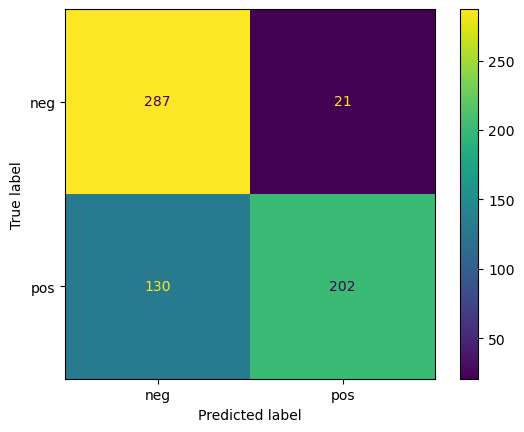

In [13]:
ConfusionMatrixDisplay.from_estimator(text_clf_nb,X_test,y_test)

In [14]:
print(classification_report(y_test,text_clf_nb.predict(X_test)))

              precision    recall  f1-score   support

         neg       0.69      0.93      0.79       308
         pos       0.91      0.61      0.73       332

    accuracy                           0.76       640
   macro avg       0.80      0.77      0.76       640
weighted avg       0.80      0.76      0.76       640



## Feed the training data through the second pipeline
Next we'll run Linear SVC

In [15]:
text_clf_svc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC(dual='auto'))])

## Run predictions and analyze the results (Linear SVC)

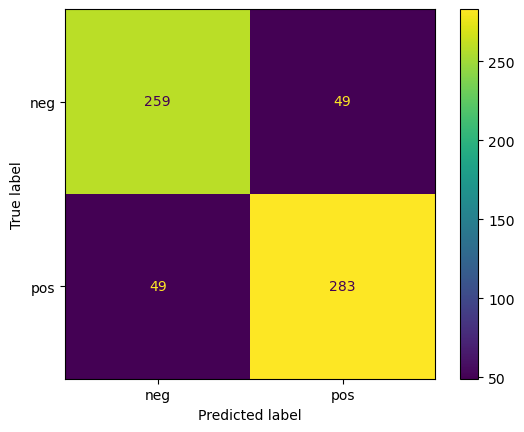

In [16]:
ConfusionMatrixDisplay.from_estimator(text_clf_svc,X_test,y_test)

In [17]:
print(classification_report(y_test,text_clf_svc.predict(X_test)))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640

